# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Ticker dos ativos escolhidos
tickers = ['WEGE3.SA', 'BBAS3.SA', 'PETR4.SA']
start_date = '2018-11-07'  # Data de início
end_date = '2023-11-07'    # Data de fim

# Baixar os dados de cada ativo e salvar em CSV
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data.to_csv(f'{ticker}_5anos.csv') 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [11]:
# Lista de ativos
ativos_data = {}

# Calcular a amplitude e guardar os dados
for ticker in tickers:
    # Carregar os dados
    data = pd.read_csv(f'{ticker}_5anos.csv', index_col='Date', parse_dates=True)
    
    # Nova coluna com o cálculo da amplitude
    data['Amplitude'] = data['High'] - data['Low']
    
    # Armazenar os dados processados
    ativos_data[ticker] = data

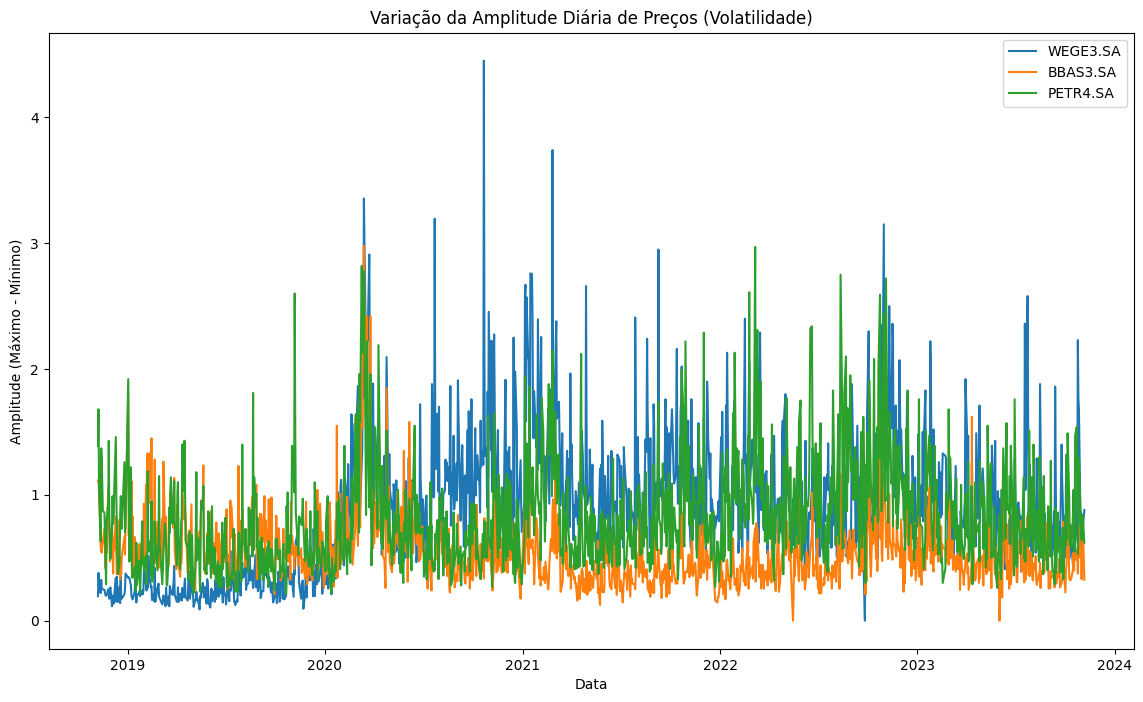

In [13]:
# Plotar a amplitude de cada ativo
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(ativos_data[ticker].index, ativos_data[ticker]['Amplitude'], label=ticker)

# Configurações do gráfico
plt.title('Variação da Amplitude Diária de Preços (Volatilidade)')
plt.xlabel('Data')
plt.ylabel('Amplitude (Máximo - Mínimo)')
plt.legend()
plt.show()

In [15]:
for ticker in tickers:
    avg_amplitude = ativos_data[ticker]['Amplitude'].mean()
    print(f"A média da amplitude para {ticker} é: {avg_amplitude}")

A média da amplitude para WEGE3.SA é: 0.8941526158958601
A média da amplitude para BBAS3.SA é: 0.55345843933204
A média da amplitude para PETR4.SA é: 0.8274253455740103
